### **ML practice-Week 6:**
Logistic Regression for binary classification

**Introduction**

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class. 
- If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). 
- This makes it a binary classifier.

# **Loading the dataset**


**Cleveland Heart-disease dataset**

Attribute Information:

1. Age (in years)
2. Sex (1 = male; 0 = female)
3. cp -chest pain type
4. trestbps - resting blood pressure (anything above 130-140 is typically cause for concern)
5. chol-serum cholestoral in mg/dl (above 200 is cause for concern)
6. fbs - fasting blood sugar ( > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (0 = normal;1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach-maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - depression induced by exercise relative to rest
11. slope -  slope of the peak exercise ST segment (1 = upsloping; 2 = flat Value; 3 = downsloping)
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - (3 = normal; 6 = fixed defect; 7 = reversable defect
14. **num** (target) -  diagnosis of heart disease (angiographic disease status)( 0: < 50% diameter narrowing ; 1: > 50% diameter narrowing)

[Reference](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

**Import basic libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

**Download Heart disease dataset**

In [ ]:
#Define the column names
cols = ['age', 'sex', 'cp', 'trestbps', 'chol',  'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'num']

# Load the dataset
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None, names=cols)
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
# to check the type of data variable

type(heart_data)

pandas.core.frame.DataFrame

In [ ]:
# Display first five rows of the dataset
heart_data.head() #head is first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Display last five rows of the dataset
heart_data.tail() #tail is last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


# **Visualizing dataset and features**

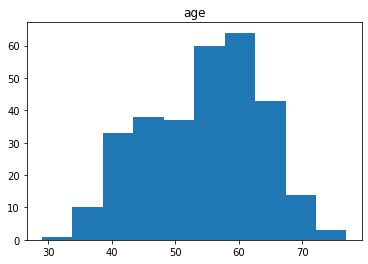

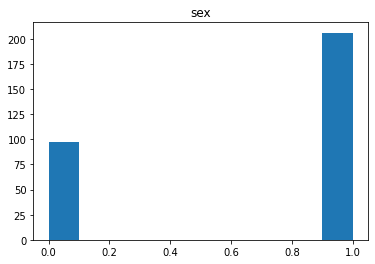

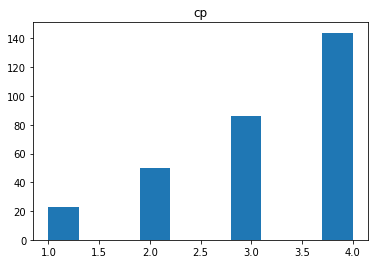

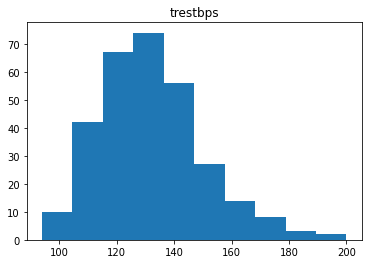

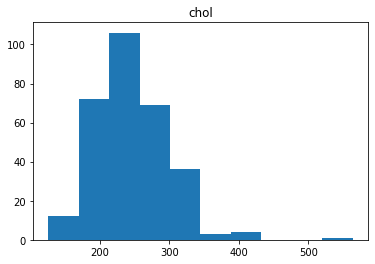

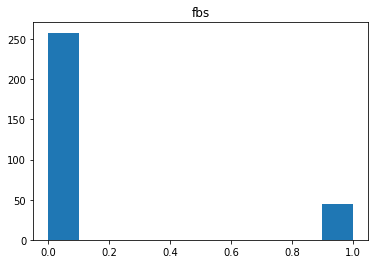

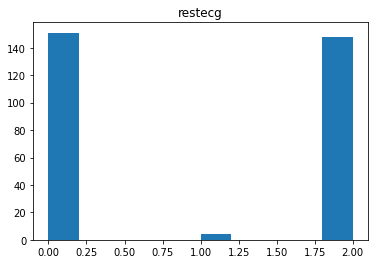

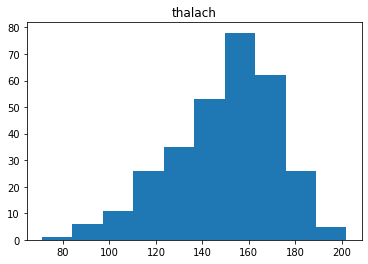

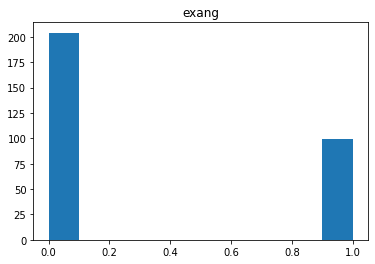

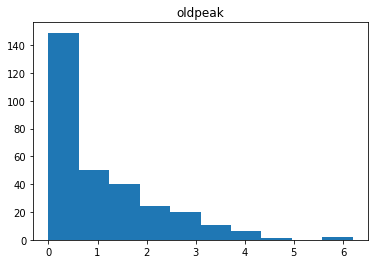

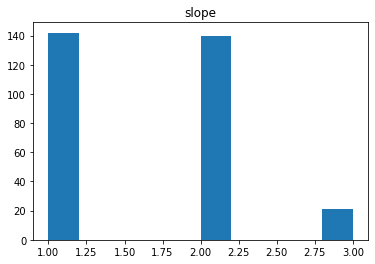

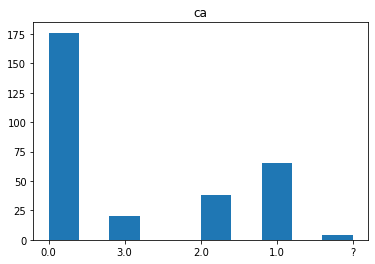

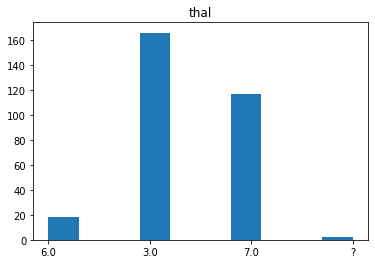

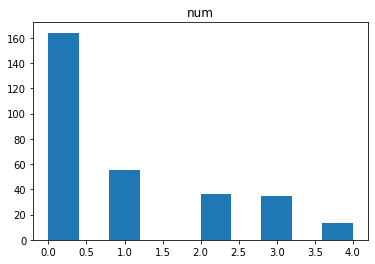

In [ ]:
for feature in cols:
  plt.hist(heart_data[feature])
  plt.title(feature)
  # display histogram
  plt.show()

### **Preprocessing : class labels**

* Experiments with the  database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)
* Let us change instances with labels 2,3 and 4 to 1.

In [ ]:
# converting class labels 2,3, and 4 into label 1
heart_data = heart_data.replace({"num":  {2:1,3:1, 4:1}})

# Visualize the label
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### **Preprocessing : Replacing missing values**

The feature 'ca' has missing values that are given as '?'. Let us replace the '?' with nan and then fill those missing values using 'mean' imputation strategy.

In [ ]:
heart_data.replace('?',np.nan, inplace=True)
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer = imputer.fit(heart_data)
heart_imputed = imputer.transform(heart_data)
heart_data_imputed = pd.DataFrame(heart_imputed, columns = cols)
heart_data_imputed

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,1.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1.0


Let us first separate the input attributes and target attribute.

In [ ]:
# Assign a new variable y as target

y = heart_data_imputed['num']
y = np.array(y)
y

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

In [ ]:
# Remove the target variable from heart_data

del heart_data_imputed['num']

In [ ]:
heart_data_imputed.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


### **Understanding the correlation between Input features**

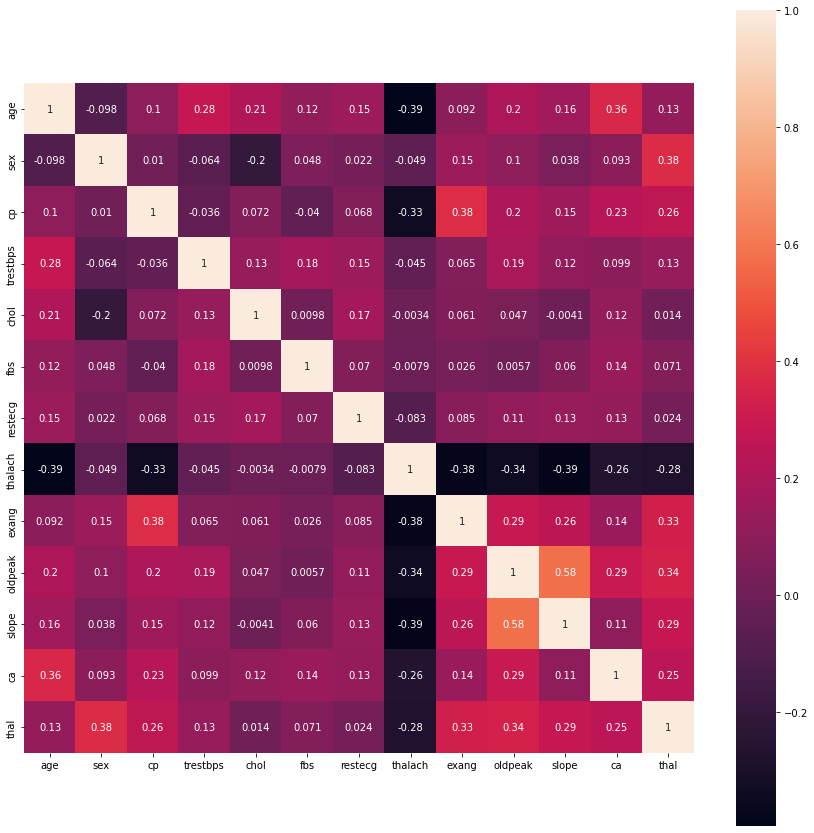

In [ ]:
plt.figure(figsize=[15,15])
sns.heatmap(heart_data_imputed.corr(),annot = True, square = True)
plt.show()

# **Train and Test data split**

In [ ]:
# Let us split the data for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart_data_imputed, y, test_size = 0.25, random_state = 0)

print('Shape of training data',X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing data', X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (227, 13)
Shape of training labels (227,)
Shape of testing data (76, 13)
Shape of testing labels (76,)


In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
173,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.000000,3.0
261,58.0,0.0,2.0,136.0,319.0,1.0,2.0,152.0,0.0,0.0,1.0,2.000000,3.0
37,57.0,1.0,4.0,150.0,276.0,0.0,2.0,112.0,1.0,0.6,2.0,1.000000,6.0
101,34.0,1.0,1.0,118.0,182.0,0.0,2.0,174.0,0.0,0.0,1.0,0.000000,3.0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,0.672241,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,58.0,1.0,4.0,146.0,218.0,0.0,0.0,105.0,0.0,2.0,2.0,1.000000,7.0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,0.672241,7.0
117,35.0,0.0,4.0,138.0,183.0,0.0,0.0,182.0,0.0,1.4,1.0,0.000000,3.0
47,50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.000000,7.0


As there is a wide variation among the numerical values between features, it is a best practice to normalize the features before training.

### **Normalizing features for training**

In [ ]:
# Instantiate the scaler to a variable and fit the train and test data

ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)

# **Perform Classification**

In [ ]:
LR = LogisticRegression()
 
classifier=LR.fit(X_train_norm, y_train)

score = LR.score(X_train_norm, y_train)

print("Training score: ", score) 

#Make the prediction
y_pred = LR.predict(X_test_norm)


Training score:  0.8634361233480177


In [ ]:
# Import the libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem. 

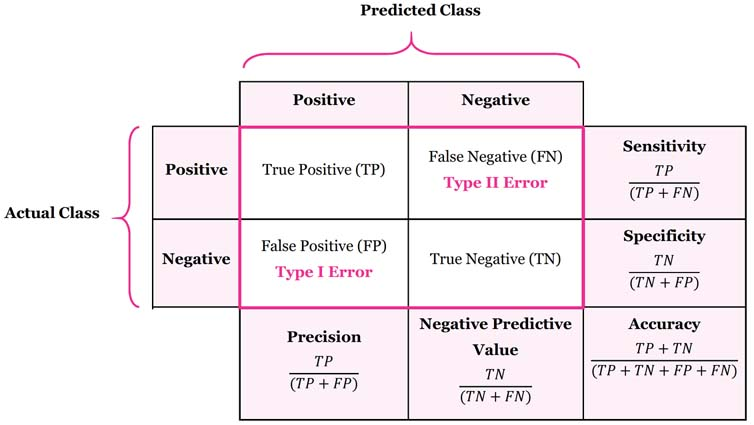

[Source](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


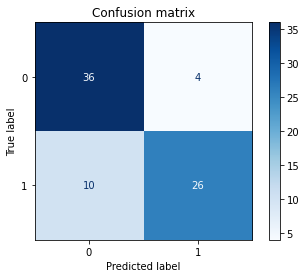

In [ ]:
# visualizing the confusion matrix

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

class_names=["0","1"]
plot_confusion_matrix(classifier, X_test_norm, y_test,display_labels=class_names,cmap=plt.cm.Blues)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks, class_names)
plt.title('Confusion matrix')
plt.show()

In [ ]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84        40
         1.0       0.87      0.72      0.79        36

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



### **Hyperparameter tuning with RandomizedSearchCV and GridSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


**RandomizedSearchCV**

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid_rs = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Tune LogisticRegression

np.random.seed(42)

# Setup random hypterparameter search for LogisticRegression with cross-validation 
RS_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid_rs,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparamter search model for LogisticRegression
RS_log_reg.fit(X_train_norm, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
?LogisticRegression()

Object `LogisticRegression()` not found.


In [ ]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [ ]:
# Find the best hyperparameters
RS_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [ ]:
RS_log_reg.score(X_train_norm, y_train)

0.8678414096916299

In [ ]:
# Make predictions with tuned model
y_preds = RS_log_reg.predict(X_test_norm)
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[36  4]
 [10 26]]


In [ ]:
?plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


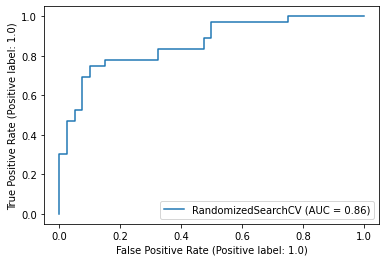

In [ ]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(RS_log_reg, X_test_norm, y_test)

**GridSearchCV**

In [ ]:
# Setup grid hyperparamter search for LogisticRegression
log_reg_grid_gs = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

GS_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid_gs,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
GS_log_reg.fit(X_train_norm, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
np.logspace(-4, 4, 30)

array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04])

In [ ]:
# Check the best hyperparameters
GS_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [ ]:
# Evaluate the grid search LogisticRegression model
GS_log_reg.score(X_train_norm, y_train)

0.8634361233480177

In [ ]:
# Make predictions with tuned model
y_preds = GS_log_reg.predict(X_test_norm)
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[36  4]
 [10 26]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


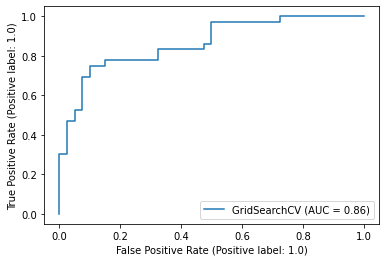

In [ ]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(GS_log_reg, X_test_norm, y_test)

# **With Pipeline**

Accuracy: 83.26 %
[[36  4]
 [10 26]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


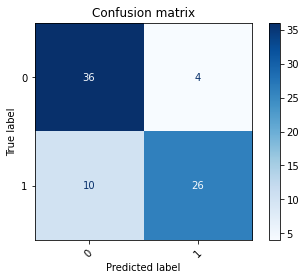

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
pipe = Pipeline([('scaler', StandardScaler()),
                         ("classifier", LogisticRegression())])
pipe.fit(X_train,y_train)

# Evaluate the model using crossvalidation
acc = cross_val_score(pipe, X_train, y_train,cv=10)
print("Accuracy: {:.2f} %".format(acc.mean()*100))

y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

plot_confusion_matrix(pipe, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.title('Confusion matrix')
plt.show()